# Sales *Prediction*

## Problem Statement
### Build a model which predicts sales based on the money spent on different platforms for marketing.




## Data
### Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.


In [33]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Univariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
Xaxis = ["TV","Radio","Newspaper","Sales"]
def histogram(list_a):
  for i in list_a:
    plt.hist(x = data[i])
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title(i)
    plt.show()


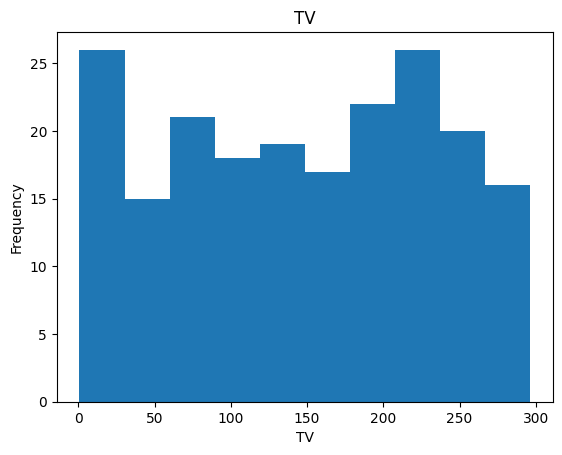

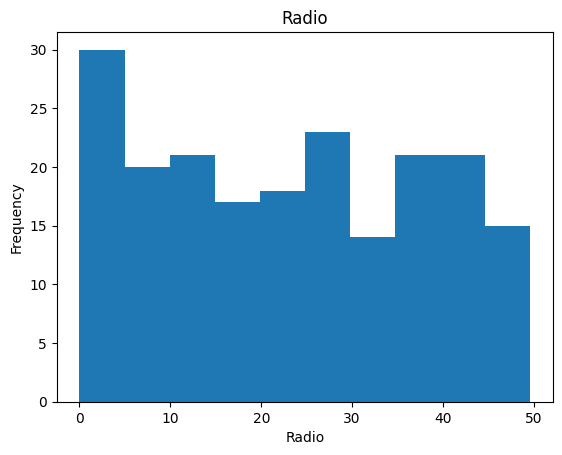

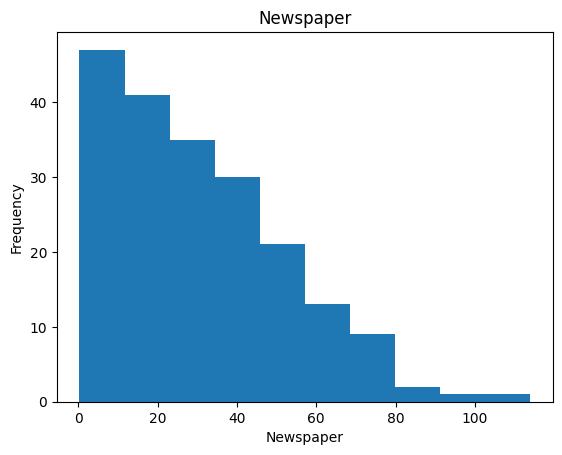

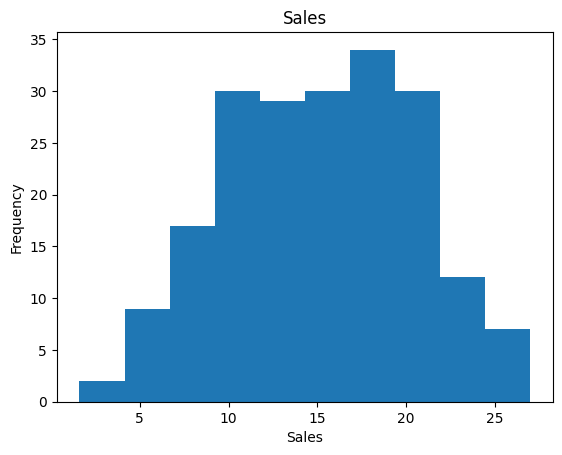

In [6]:
histogram(Xaxis)

In [7]:
Xaxis = ["TV","Radio","Newspaper","Sales"]
def lineplot(list_a):
  for i in list_a:
    plt.plot(data[i])
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title(i)
    plt.show()


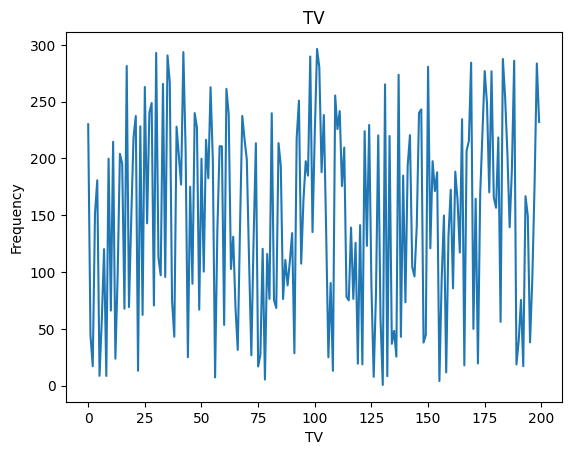

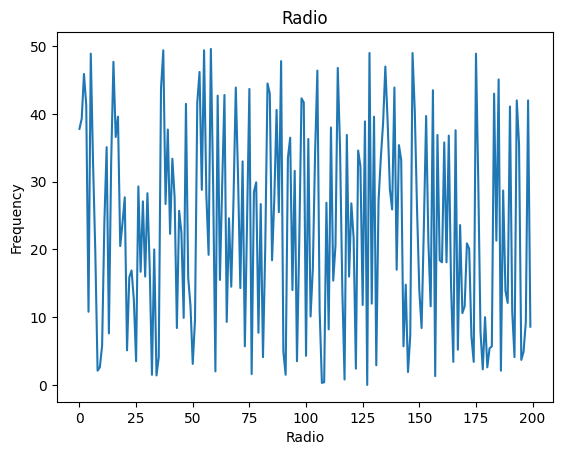

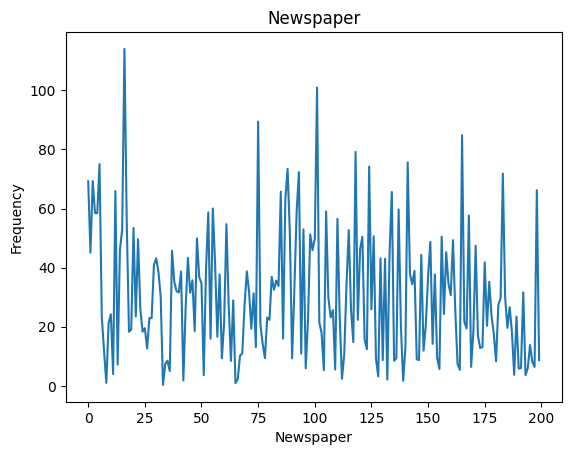

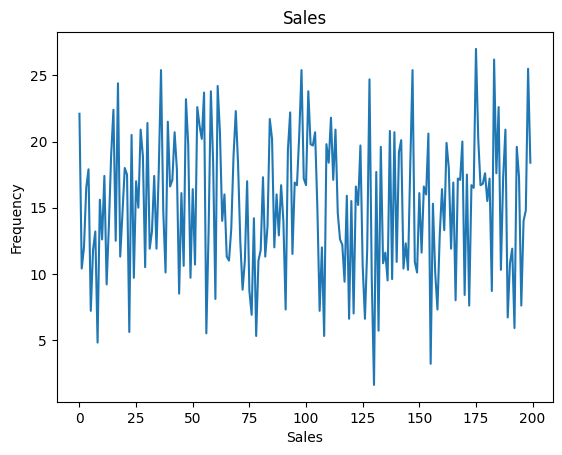

In [8]:
lineplot(Xaxis)

<Figure size 400x400 with 0 Axes>

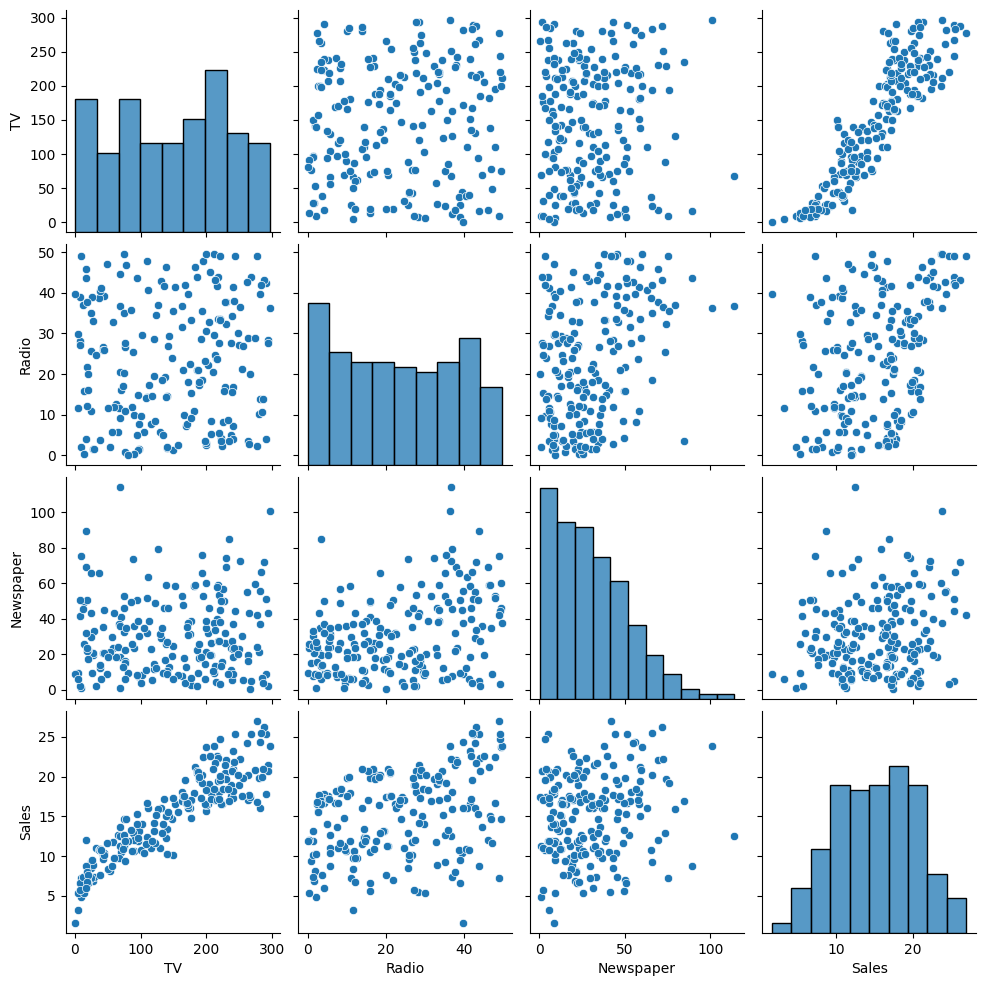

In [9]:
# Multivariate analysis
plt.figure(figsize = (4,4))
sns.pairplot(data)
plt.show()

In [10]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


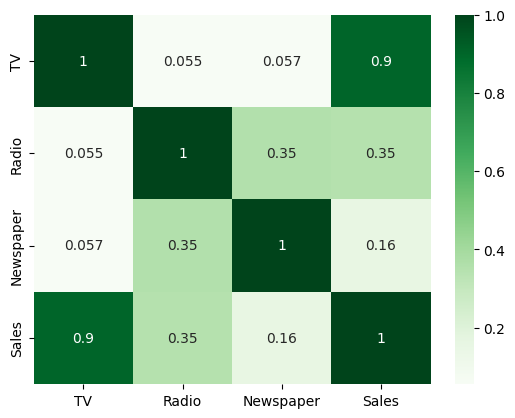

In [11]:
sns.heatmap(data.corr(), annot=True, cmap='Greens')  # Corrected the cmap
plt.show()

# Start building Model


In [12]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
# Divide the datasets between dependent and independent variables
X = data.drop("Sales", axis = 1)
y = data["Sales"]

In [14]:
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [15]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 3), (140,), (60, 3), (60,))

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[ 1.53003874e+00, -8.86292904e-01, -1.16598019e+00],
       [ 3.41038651e-01, -1.73144262e-01, -4.09601321e-01],
       [-5.20208901e-01, -4.20003407e-01,  3.95263370e-01],
       [-1.58600275e+00,  7.93720724e-01,  1.71892638e+00],
       [ 1.60659408e+00, -1.33201081e+00, -1.06415995e+00],
       [-1.63863454e+00, -5.16004186e-01, -3.95055573e-01],
       [ 1.64128322e+00,  2.86288037e-01, -1.38901498e+00],
       [-1.64700778e+00, -7.83434927e-01, -3.41721166e-01],
       [-2.64226989e-01, -1.27715322e+00, -1.02537129e+00],
       [-1.56447156e+00,  1.06115147e+00, -1.02537129e+00],
       [-6.69731045e-01, -9.54864889e-01, -1.30174050e+00],
       [-9.11358830e-01, -1.61315594e+00, -1.03021988e+00],
       [ 3.82904851e-01, -3.72003018e-01, -2.35052352e-01],
       [ 2.46540656e-01,  6.77148350e-01,  4.00111952e-01],
       [-3.67098225e-01,  9.17150297e-01,  2.36378785e+00],
       [ 6.36494408e-01, -2.00573056e-01, -9.57491140e-01],
       [-1.61355754e-01,  3.96003212e-01

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Fit the model


LinearRegression()

In [23]:
y_pred = model.predict(X_test_scaled)


In [24]:
from sklearn.metrics import r2_score


In [25]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9091484341849798


In [26]:
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)


Adjusted R² Score: 0.904281386016318


In [32]:
model.coef_

array([4.47999622, 1.49779488, 0.16358735])

In [31]:
# Now predecting using stats model

import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     374.3
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           1.69e-65
Time:                        11:26:46   Log-Likelihood:                -271.70
No. Observations:                 140   AIC:                             551.4
Df Residuals:                     136   BIC:                             563.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7438      0.400     11.863      0.0

# Assumptions of Linear Regression

## 1 Linearity Check
- Check the linearity assumption by plotting the actual vs. predicted values. If the plot shows a linear relationship, this assumption holds.



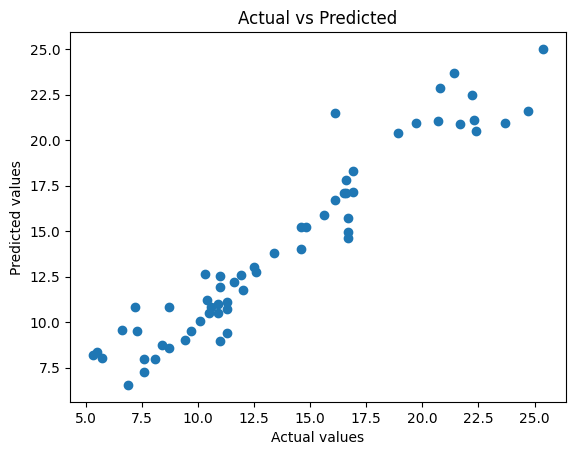

In [35]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

# Homoscedasticity
- This assumption checks that the residuals (errors) have constant variance. You can check for homoscedasticity by plotting the residuals against the predicted values.

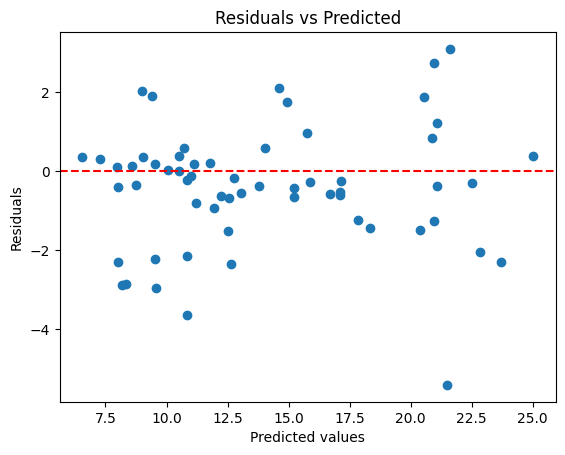

In [36]:
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

## Normality of Residuals
- You can check this assumption by plotting a Q-Q plot (quantile-quantile plot) or by using a histogram of the residuals

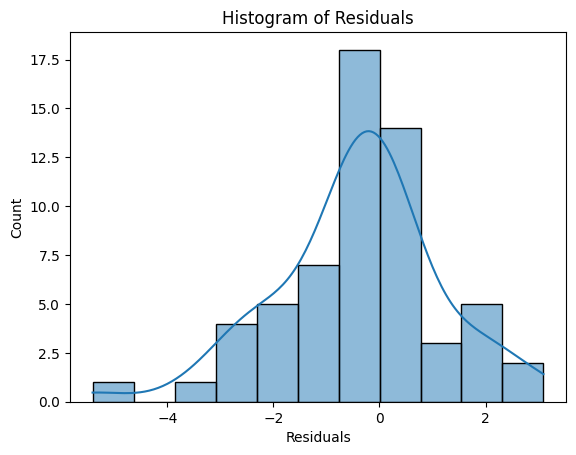

In [37]:
# Histogram to check the distribution of residuals
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()


#  No Multicollinearity
- You can check for multicollinearity by calculating the Variance Inflation Factor (VIF) for each predictor. A VIF > 10 indicates high multicollinearity.



In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


     feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245
